<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Galaxy_Glimpse_Planetary_Wisdom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'planet-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2512299%2F6147355%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T113439Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e376e89b35001ce53a2a8608752351e08aceb448a3d97c8f24955a8b8e5db08f5a8fc8b9d0aebc49e5e56bd32479014550bceb67f9786ffa1dc476663e81d1621b5f138d1d4b0713c95b1d0c50701e8aba9e8d3178cc85176f40671c452594548e66d7477a48f4b7056e86ea6f7d93f02240943f0ca8b3eaa8bc38a54aff8ac5f0f8b2370796f19b9f7f034fe513bea8d411fca7488d4f7c1a8a2e54044ed6cd2c32b50cd529c7ea37dc8afb25fbf9bb031788cf33b4e17281d902f1b16a2d3983af379db6f317bb549d5c88376dfe2a838e301c5330f133b72f4b724ef2b5b06511714fe012a2dc70760ec52e23d177c4de1571f96b2ffce18c5aef0be6745'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


<h1><center style="color:orange;background:purple;border-radius:50px;padding:25px">Planets of Our Solar System</center></h1>

![solar-system.jpg](attachment:b721b7d5-e177-4c19-9040-662b17a2a2e2.jpg)

<h1><center style="color:orange;background:purple;border-radius:50px;padding:25px">Author: Muhammad Faheem Ullah</center></h1>

> - **Catch me on**
- [LinkedIn](https://www.linkedin.com/in/muhammad-faheem-%F0%9F%8C%9F-seo-specialist-and-ai-professional-a15378232/)
- [Twitter](https://twitter.com/faheem_fbr)
- [Github](https://github.com/Faheem-ai)
- [Kaggle](https://www.kaggle.com/muhamadfaheem88)
- [Instagram](https://www.instagram.com/faheem_fbr/)

<h1><center id='dataset' style="color:orange;background:purple;border-radius:50px;padding:25px">About the Dataset</center></h1>

In this Dataset, we have various different parameters for 8 different Solar Planets like Name of the Planet, Color, Mass, Diameter, Density, Gravity, Escape Velocity, Rotation Period, Length of Day, Distance from Sun, Perihelion, Aphelion, Orbital Period, Orbital Velocity, Orbital Inclination, Orbital Eccentricity, Obliquity to Orbit, Mean Temperature, Surface Pressure, Number of Moons, Ring System?, Global Magnetic Field?

**Name** - Name of of the Planet.

**Color** - Color of of the Planet.

**Mass (10^24kg)** - This is the mass of the planet in septillion (1 followed by 24 zeros) kilograms or sextillion (1 followed by 21 zeros) tons. Strictly speaking, tons are measures of weight, not mass, but are used here to represent the mass of one ton of material under Earth gr gravity.

**Diameter (km)** - The diameter of the planet at the equator, the distance through the center of the planet from one point on the equator to the opposite side, in kilometers or miles.

**Density (kg/m^3)** - The average density (mass divided by volume) of the whole planet (not including the atmosphere for the terrestrial planets) in kilograms per cubic meter or pounds per cubic foot. Strictly speaking, pounds are measures of weight, not mass, but are used here to represent the mass of one pound of material under Earth's gravity.

**Gravity (m/s^2)** - The gravitational acceleration on the surface at the equator in meters per second squared or feet per second squared, including the effects of rotation. For the gas giant planets, the gravity is given at the 1 bar pressure level in the atmosphere. The gravity on Earth is designated as 1 "G", so the Earth ratio fact sheets give the gravity of the other planets in G's.

**Escape Velocity (km/s)** - Initial velocity, in kilometers per second or miles per second, needed at the surface (at the 1 bar pressure level for the gas giants) to escape the body's gravitational pull, ignoring atmospheric drag.

**Rotation Period (hours)** - This is the time it takes for the planet to complete one rotation relative to the fixed background stars (not relative to the Sun) in hours. Negative numbers indicate retrograde (backward relative to the Earth) rotation.

**Length of Day (hours)** - The average time in hours for the Sun to move from the noon position in the sky at a point on the equator back to the same position.

**Distance from Sun (10^6 km)** - This is the average distance from the planet to the Sun in millions of kilometers or millions of miles, also known as the semi-major axis. All planets have orbits whic are elliptical, not perfectly circular, so there is a point in the orbit at which the planet is closest to the Sun, the perihelion, and a point furthest from the Sun, the aphelion. The average distance from the Sun is midway between these two values. The average distance from the Earth to the Sun is defined as 1 Astronomical Unit (AU), so the ratio table gives this distance in AU.

**Perihelion, Aphelion (10^6 km)** - The closest and furthest points in a planet's orbit about the Sun, see "Distance from Sun" above.

**Orbital Period (days)** - This is the time in Earth days for a planet to orbit the Sun from one vernal equinox to the next. Also known as the tropical orbit period, this is equal to a year on Earth.

**Orbital Velocity (km/s)** - The average velocity or speed of the planet as it orbits the Sun, in kilometers per second or miles per second.

**Orbital Inclination (degrees)** - The angle in degrees at which a planet's orbit around the Sun is tilted relative to the ecliptic plane. The ecliptic plane is defined as the plane containing the Earth's orbit, so the Earth's inclination is 0.

**Orbital Eccentricity** - This is a measure of how far a planet's orbit about the Sun (or the Moon's orbit about the Earth) is from being circular. The larger the eccentricity, the more elongated the orbit, an eccentricity of 0 means the orbit is a perfect circle. There are no units for eccentricity.

**Obliquity to Orbit (degrees)** - The angle in degrees the axis of a planet (the imaginary line running through the center of the planet from the north to south poles) is tilted relative to a line perpendicular to the planet's orbit around the Sun, north pole defined by the right-hand rule. Venus rotates in a retrograde direction, opposite the other planets, so the tilt is almost 180 degrees, it is considered to be spinning with its "top", or north pole pointing "downward" (southward). Uranus rotates almost on its side relative to the orbit, Pluto is pointing slightly "down". The ratios with Earth refer to the axis without reference to north or south.

**Mean Temperature (C)** - This is the average temperature over the whole planet's surface (or for the gas giants at the one bar level) in degrees C (Celsius or Centigrade) or degrees F (Fahrenheit). For Mercury and the Moon, for example, this is an average over the sunlit (very hot) and dark (very cold) hemispheres and so is not representative of any given region on the planet, and most of the surface is quite different from this average value. As with the Earth, there will tend to be variations in temperature from the equator to the poles, from the day to night sides, and seasonal changes on most planets.

**Surface Pressure (bars)** - This is the atmospheric pressure (the weight of the atmosphere per unit area) at the surface of the planet in bars or atmospheres. The surfaces of Jupiter, Saturn, Uranus, and Neptune are deep in the atmosphere and the location and pressures are not known.

**Number of Moons** - This gives the number of IAU officially confirmed moons orbiting the planet. New moons are still being discovered.

**Ring System?** - This tells whether a planet has a set of rings around it, Saturn being the most obvious example.

**Global Magnetic Field?** - This tells whether the planet has a measurable large-scale magnetic field. Mars and the Moon have localized regional magnetic fields but no global field.

**Note: The term "terrestrial planets" refers to Mercury, Venus, Earth, Moon, Mars and the term "gas giants" refers to Jupiter, Saturn, Uranus, Neptune.**

<h1><center id='libraries' style="color:orange;background:purple;border-radius:50px;padding:25px">Importing Libraries</center></h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h1><center id='dataexploration' style="color:orange;background:purple;border-radius:50px;padding:25px">Data Exploration</center></h1>

In [ ]:
df = pd.read_csv("/kaggle/input/planet-dataset/planets_updated.csv")

In [ ]:
df.head()

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Temperature (C),Atmospheric Composition,Atmospheric Pressure (bars),Surface Features,Composition
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,...,167,0,0,No,Yes,-173 to 427,Mostly None,Trace,"Craters, Scarps",Rock and Metal
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,...,464,92,0,No,No,462,Carbon Dioxide (96.5%),92,"Volcanoes, Venusian Plains",Rock and Metal
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,15,1,1,No,Yes,-89 to 58,"Nitrogen (78.1%), Oxygen",1,"Mountains, Oceans, Forests","Rock, Water, and Air"
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,-65,0.01,2,No,No,-153 to 20,Carbon Dioxide (95.3%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,-110,Unknown,79,Yes,Yes,-108 to -150,"Hydrogen, Helium",Unknown,"Great Red Spot, Jupiter's Rings",Gas and Liquid


In [ ]:
df.shape

(8, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Planet                         8 non-null      object 
 1   Color                          8 non-null      object 
 2   Mass (10^24kg)                 8 non-null      float64
 3   Diameter (km)                  8 non-null      int64  
 4   Density (kg/m^3)               8 non-null      int64  
 5   Surface Gravity(m/s^2)         8 non-null      float64
 6   Escape Velocity (km/s)         8 non-null      float64
 7   Rotation Period (hours)        8 non-null      float64
 8   Length of Day (hours)          8 non-null      float64
 9   Distance from Sun (10^6 km)    8 non-null      float64
 10  Perihelion (10^6 km)           8 non-null      float64
 11  Aphelion (10^6 km)             8 non-null      float64
 12  Orbital Period (days)          8 non-null      object 

In [ ]:
df.isnull().sum()

Planet                           0
Color                            0
Mass (10^24kg)                   0
Diameter (km)                    0
Density (kg/m^3)                 0
Surface Gravity(m/s^2)           0
Escape Velocity (km/s)           0
Rotation Period (hours)          0
Length of Day (hours)            0
Distance from Sun (10^6 km)      0
Perihelion (10^6 km)             0
Aphelion (10^6 km)               0
Orbital Period (days)            0
Orbital Velocity (km/s)          0
Orbital Inclination (degrees)    0
Orbital Eccentricity             0
Obliquity to Orbit (degrees)     0
Mean Temperature (C)             0
Surface Pressure (bars)          0
Number of Moons                  0
Ring System?                     0
Global Magnetic Field?           0
Surface Temperature (C)          0
Atmospheric Composition          0
Atmospheric Pressure (bars)      0
Surface Features                 0
Composition                      0
dtype: int64

### Remove comma "," from the values of column 'Orbital Period'

In [ ]:
df["Orbital Period (days)"] = df["Orbital Period (days)"].str.replace(',', '')
df["Orbital Period (days)"] = df["Orbital Period (days)"].astype('float')

In [ ]:
df.head()

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Temperature (C),Atmospheric Composition,Atmospheric Pressure (bars),Surface Features,Composition
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,...,167,0,0,No,Yes,-173 to 427,Mostly None,Trace,"Craters, Scarps",Rock and Metal
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,...,464,92,0,No,No,462,Carbon Dioxide (96.5%),92,"Volcanoes, Venusian Plains",Rock and Metal
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,15,1,1,No,Yes,-89 to 58,"Nitrogen (78.1%), Oxygen",1,"Mountains, Oceans, Forests","Rock, Water, and Air"
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,-65,0.01,2,No,No,-153 to 20,Carbon Dioxide (95.3%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,-110,Unknown,79,Yes,Yes,-108 to -150,"Hydrogen, Helium",Unknown,"Great Red Spot, Jupiter's Rings",Gas and Liquid


In [ ]:
df.tail()

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Temperature (C),Atmospheric Composition,Atmospheric Pressure (bars),Surface Features,Composition
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,-65,0.01,2,No,No,-153 to 20,Carbon Dioxide (95.3%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,-110,Unknown,79,Yes,Yes,-108 to -150,"Hydrogen, Helium",Unknown,"Great Red Spot, Jupiter's Rings",Gas and Liquid
5,Saturn,"Golden, Brown, and Blue-Grey",568.000,120536,687,9.0,35.5,10.7,10.7,1432.0,...,-140,Unknown,82,Yes,Yes,-178 to -228,"Hydrogen, Helium",Unknown,"Rings, Cassini Division, Saturn's Hexagon",Gas and Liquid
6,Uranus,Blue-Green,86.800,51118,1270,8.7,21.3,-17.2,17.2,2867.0,...,-195,Unknown,27,Yes,Yes,-197,"Hydrogen, Helium",Unknown,"Rings, Miranda's Cliff, Oberon's Craters",Gas and Ice
7,Neptune,Blue,102.000,49528,1638,11.0,23.5,16.1,16.1,4515.0,...,-200,Unknown,14,Yes,Yes,-201,"Hydrogen, Helium",Unknown,"Great Dark Spot, Triton's Geysers",Gas and Ice


<h1><center style="color:orange;background:purple;border-radius:50px;padding:25px">Data Visualization</center></h1>

## 1. How many planets in our solar system?

In [ ]:
df.Planet

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
Name: Planet, dtype: object

## Observation
> - There are eight planets in our solar system
1. Mercury
2. Venus
3. Earth
4. Mars
5. Jupiter
6. Saturn
7. Uranus
8. Neptune

## 2. Which is the largest planet by size?

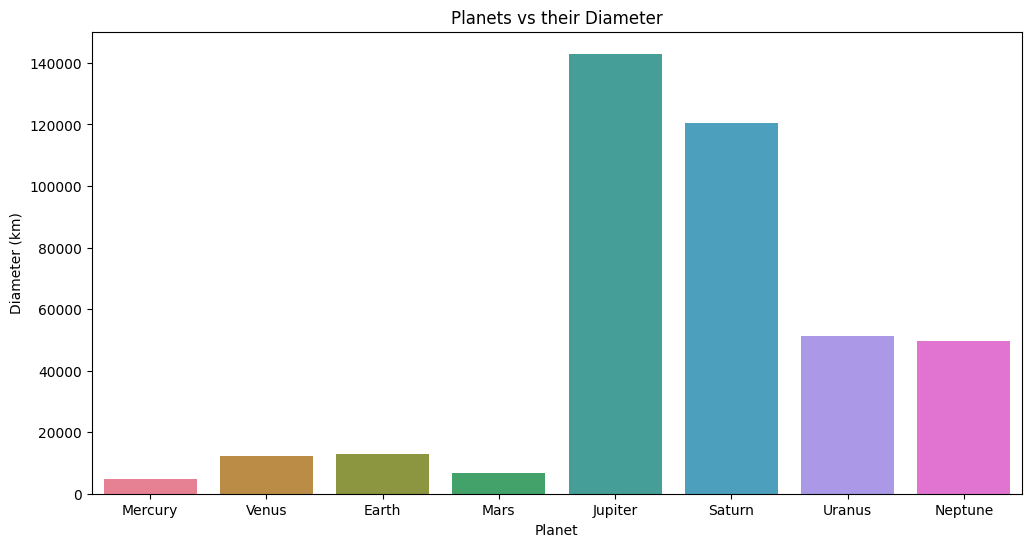

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Planet'], y=df['Diameter (km)'], palette='husl')
plt.ylabel('Diameter (km)')
plt.xlabel('Planet')
plt.title('Planets vs their Diameter')
plt.show()

## Observation
> - Jupiter is the largest while Mercury is the smallest planet

> - Jupiter is the largest planet in the solar system because it had the largest foundation to attract matter as a protoplanet. In the formation of the solar system 4.5 billion years ago, each planet formed from a protoplanet foundation, a collection of dust and gas that did not fall into the sun.

## 3. Which is the largest planet by mass?

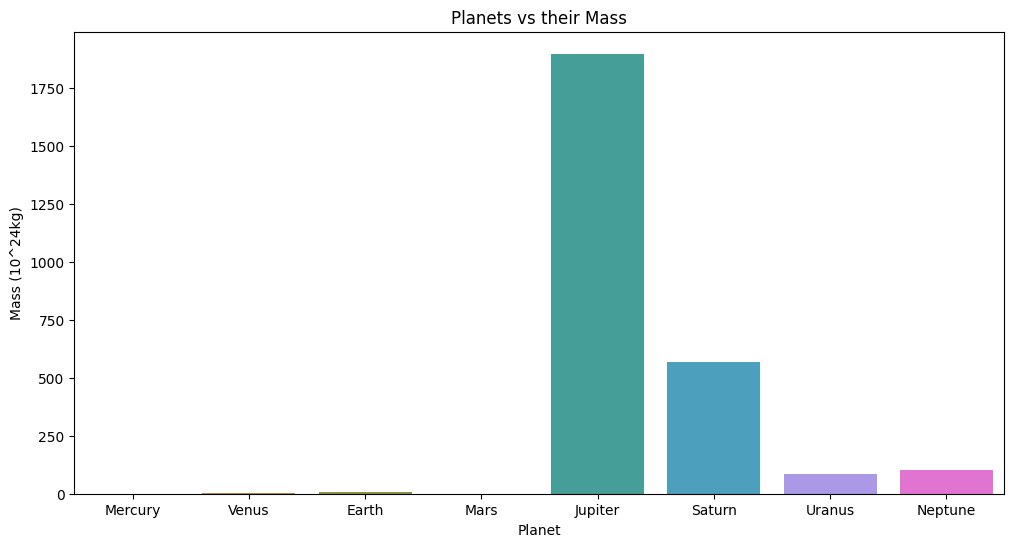

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Planet'], y=df['Mass (10^24kg)'], palette='husl')
plt.ylabel('Mass (10^24kg)')
plt.xlabel('Planet')
plt.title('Planets vs their Mass')
plt.show()

## Observation
> - Jupiter has largest mass while Mercury has smallest mass

## 4. Which planet is farthest and which is nearest to the sun?

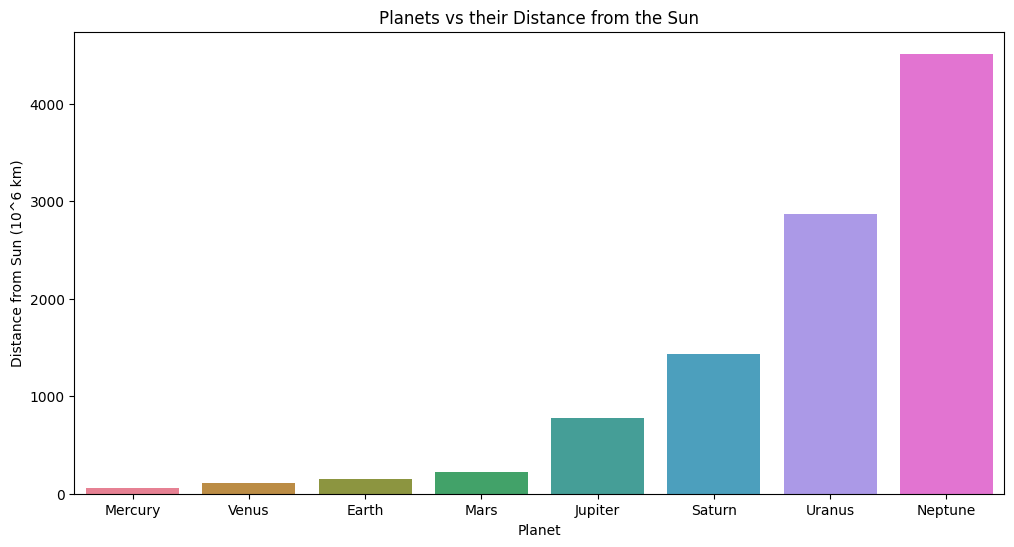

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Planet'], y=df['Distance from Sun (10^6 km)'], palette='husl')
plt.ylabel('Distance from Sun (10^6 km)')
plt.xlabel('Planet')
plt.title('Planets vs their Distance from the Sun')
plt.show()

## Observation
> - Neptune is farthest while Mercury is nearest to the sun

## 5. At which plannet the lenght of day is longest?

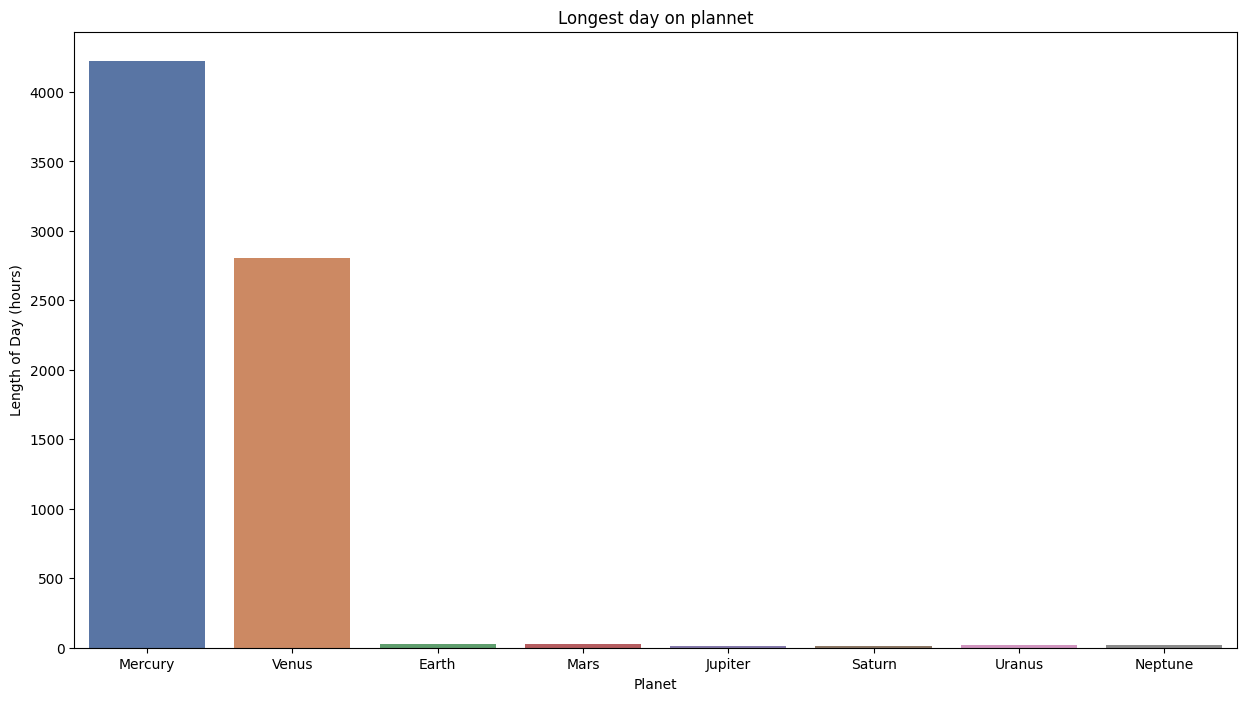

In [ ]:
# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=df['Planet'], y=df['Length of Day (hours)'], palette='deep')
plt.ylabel('Length of Day (hours)')
plt.xlabel('Planet')
plt.title('Longest day on plannet')
plt.show()

## Anomaly Observes
> - since the length of day on venus is greater than that on mercury. So, there is anomaly in the data set which should be corrected so, we correct it

## Correcting Anomaly in the Dataset

In [ ]:
# Replace incorrect values with correct values
df['Length of Day (hours)'].replace({4222.6: 1407.6, 2802.0: 5832.5}, inplace=True)

# Save the updated dataset to a new file or overwrite the existing one
df.to_csv('planets_updated.csv', index=False)

In [ ]:
df.head()

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Temperature (C),Atmospheric Composition,Atmospheric Pressure (bars),Surface Features,Composition
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,1407.6,57.9,...,167,0,0,No,Yes,-173 to 427,Mostly None,Trace,"Craters, Scarps",Rock and Metal
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,5832.5,108.2,...,464,92,0,No,No,462,Carbon Dioxide (96.5%),92,"Volcanoes, Venusian Plains",Rock and Metal
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,15,1,1,No,Yes,-89 to 58,"Nitrogen (78.1%), Oxygen",1,"Mountains, Oceans, Forests","Rock, Water, and Air"
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,-65,0.01,2,No,No,-153 to 20,Carbon Dioxide (95.3%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,-110,Unknown,79,Yes,Yes,-108 to -150,"Hydrogen, Helium",Unknown,"Great Red Spot, Jupiter's Rings",Gas and Liquid


## Graph after Correction of Anomaly

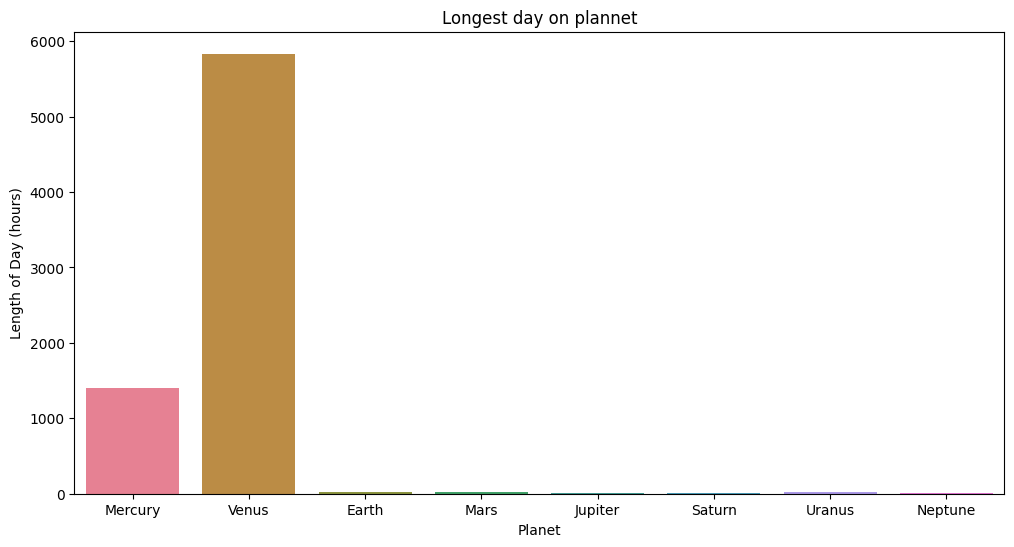

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Planet'], y=df['Length of Day (hours)'], palette='husl')
plt.ylabel('Length of Day (hours)')
plt.xlabel('Planet')
plt.title('Longest day on plannet')
plt.show()

## Observation
> - Venus has the longest day of any planet in the solar system. This is because Venus takes 243 Earth days to rotate once on its axis, while Earth takes 24 hours. Venus has the slowest rotation of any planet, Venusian day is longer than a Venusian year, which is only about 224 Earth-days long. Many scientists believe that the long days are a result of the sun's strong pull on the planet.


## 6. Which planet of the Solar system has clockwise rotation and why?

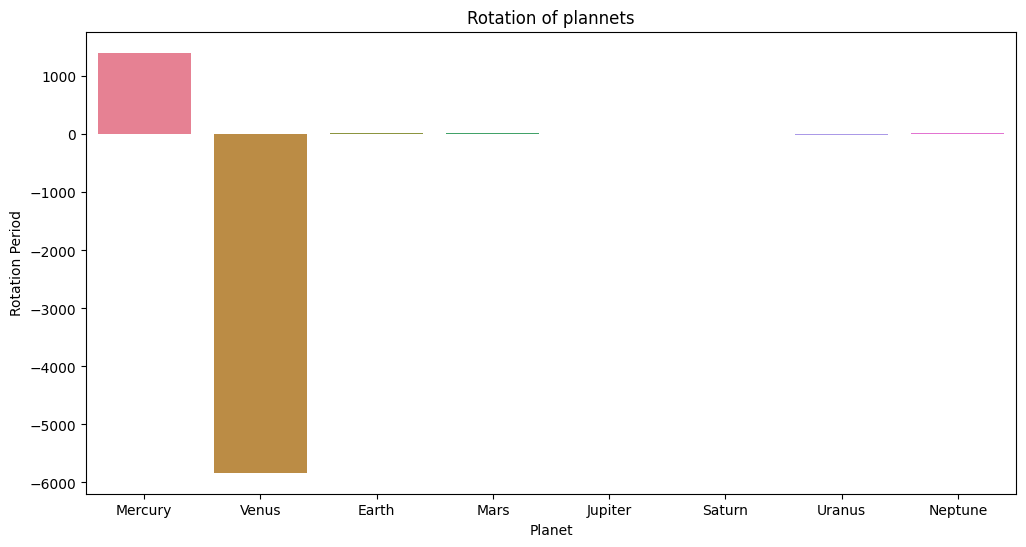

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(df, x=df["Planet"], y=df["Rotation Period (hours)"], palette="husl")
plt.title("Rotation of plannets")
plt.xlabel('Planet')
plt.ylabel('Rotation Period')
plt.show()

## Observation

> - Most planets rotate on their axes in an anticlockwise direction, but Venus rotates clockwise in retrograde rotation (which means it rotates in the opposite direction to its orbital direction. This means that Venus rotates "backwards" or "upside down" in the negative z-direction).

> - Venus is the only planet in our solar system, aside from Uranus, that rotates clockwise. Scientists don't have a definitive answer as to why, but there are many theories:

> ## Planetary collision
Venus may have originally rotated counterclockwise like the other planets, but was struck by a large object, possibly another planet, that changed its direction or reversed its rotation. This theory would also explain why Venus rotates so slowly, taking 243 Earth days to complete one rotation, compared to Earth's 24-hour rotation.
> ## Tidal effects
Tidal effects from friction between Venus's core and mantle, combined with the Sun's tidal effects on its thick atmosphere, may have imparted clockwise momentum on Venus's rotation, slowly converting it from counterclockwise to clockwise.

## 7. Which planet has greatest density?

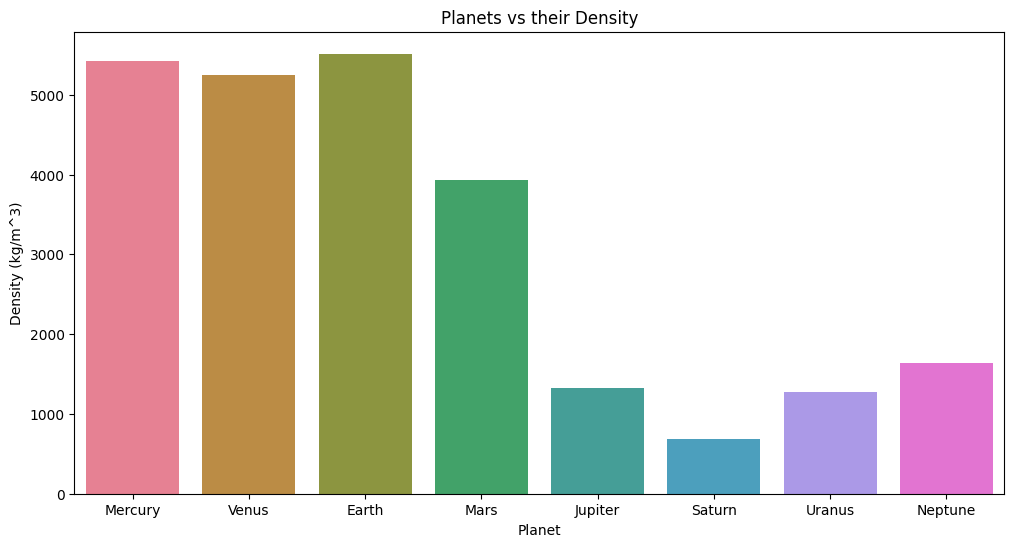

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Density (kg/m^3)'], palette="husl")
plt.ylabel('Density (kg/m^3)')
plt.xlabel('Planet')
plt.title('Planets vs their Density')
plt.show()

## Observation
> - Earth is the densest planet in our solar system, with an average density of 5,514 kg/m³. Mercury is the second densest planet, with a mean density of 5,429 kg/m³.

> - In general, terrestrial (rocky) planets are denser than the gas and ice giants. The four inner terrestrial planets are dense compared to the four outer planets because the inner planets are made up mainly of dense, solid rock, while the outer planets are composed primarily of gas.

> - Saturn, the least dense planet in the Solar System on the other hand, has a density lower than that of water.

## 8. Which planet has longest Year?

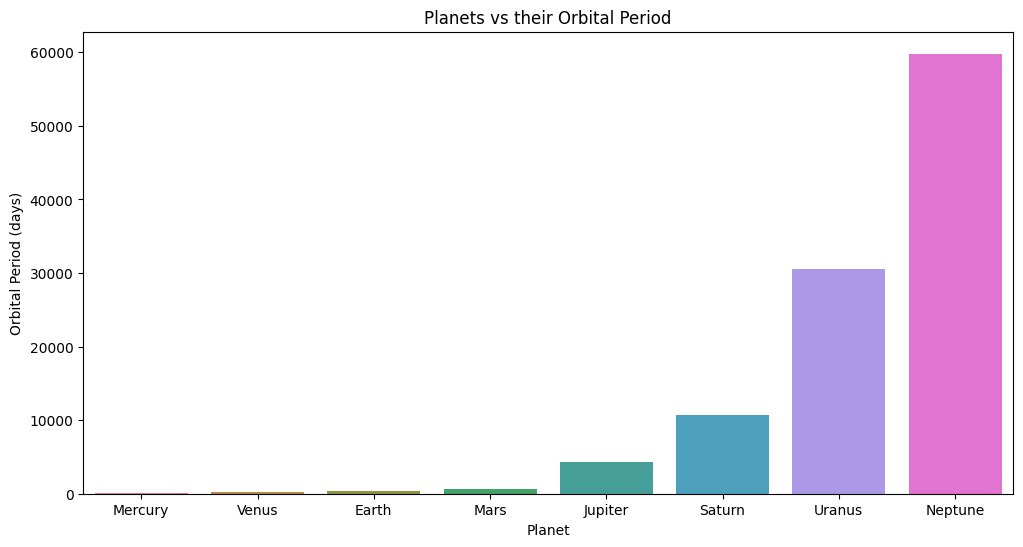

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Orbital Period (days)'], palette="husl")
plt.ylabel('Orbital Period (days)')
plt.xlabel('Planet')
plt.title('Planets vs their Orbital Period')
plt.show()

## Observation

> ### Mercury
The closest planet to the sun, Mercury has a shorter orbital period of 88 days. The sun's stronger gravitational pull on Mercury makes it move faster, and its shorter orbital path also contributes to its shorter orbital period.

> ### Neptune
Neptune has the longest orbital period of any planet in the Solar System. As such, a year on Neptune is the longest of any planet, lasting the equivalent of 164.8 years (or 60,182 Earth days). Planets that are farther from the sun have longer paths and travel slower because the sun's gravitational pull is weaker.


## 9. Which planet has largest Escape velocity and why?

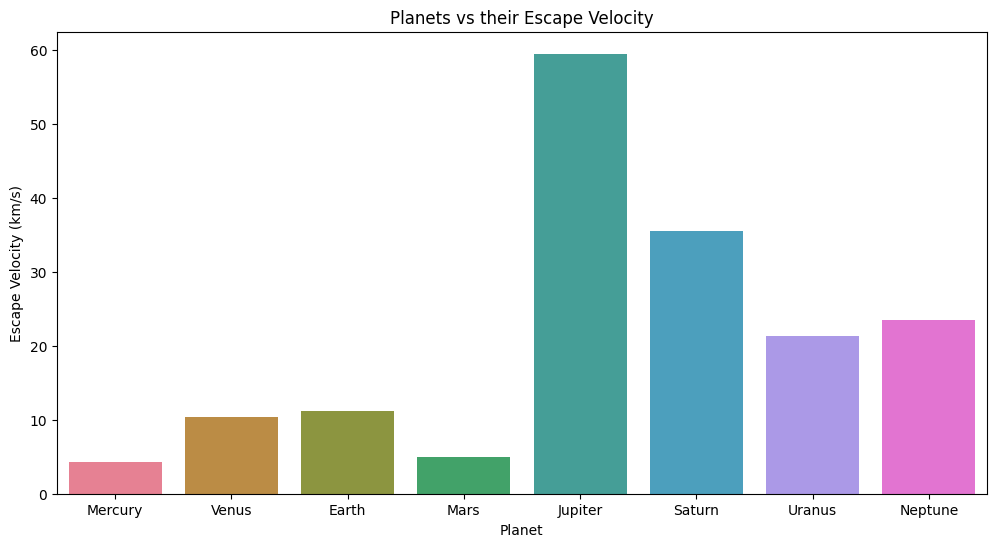

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Escape Velocity (km/s)'], palette="husl")
plt.ylabel('Escape Velocity (km/s)')
plt.xlabel('Planet')
plt.title('Planets vs their Escape Velocity')
plt.show()

## Observation

> - Escape velocity is the minimum velocity that a body must attain to escape a gravitation field completely.

> - Escape velocity depends on the mass and radius of a celestial body. The gravitational force between two objects depends on their combined mass.
  
> - Jupiter has the highest escape velocity among planets. This is because Jupiter has the highest mass. The escape velocity of Jupiter is 59.5 km/s.

## 10. Which planet has highest surface gravity and why?

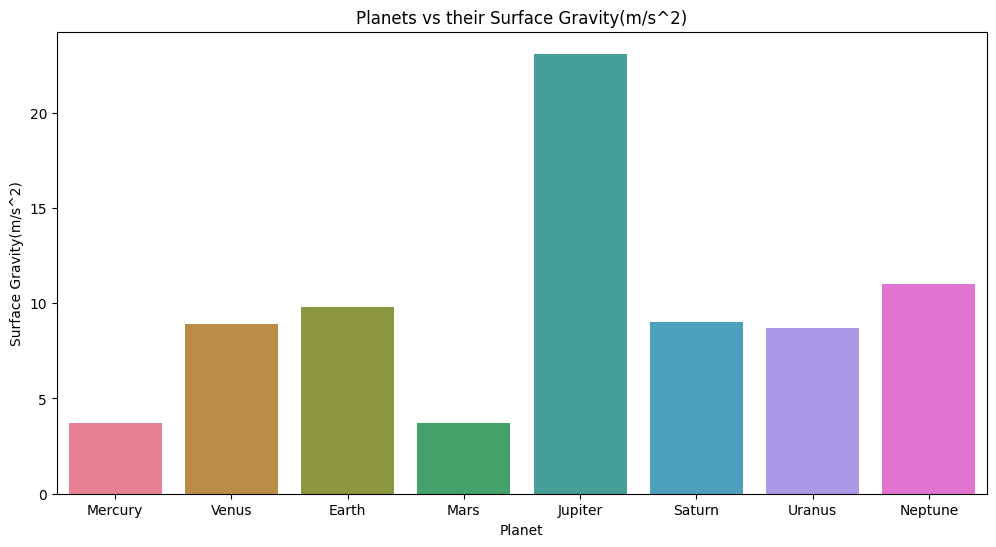

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Surface Gravity(m/s^2)'], palette="husl")
plt.ylabel('Surface Gravity(m/s^2)')
plt.xlabel('Planet')
plt.title('Planets vs their Surface Gravity(m/s^2)')
plt.show()

## Observation

> - Surface gravity is the gravitational force experienced at the surface of an astronomical object, including the effects of rotation. It is measured in units of acceleration, such as meters per second squared (m/s²). Surface gravity is also expressed as a multiple of the Earth's standard surface gravity, which is 9.80665 m/s²

> - The surface gravity of a planet is determined by both its mass and radius. The equation for gravitational force states that the force of gravity decreases with the square of the distance from the center of mass.

> - Jupiter's surface gravity is 2.4 times greater than Earth's because Jupiter is more massive than Earth. However, Jupiter's surface gravity is only 2.5 times greater than Earth's because Jupiter's radius is much larger than Earth's. This means that a point on Jupiter's surface is farther from its center of mass and experiences a weaker gravitational pull. That's why Jupiter has highest Escape velocity.

## 11. Why Venus is the hottest plannet in the solar system?

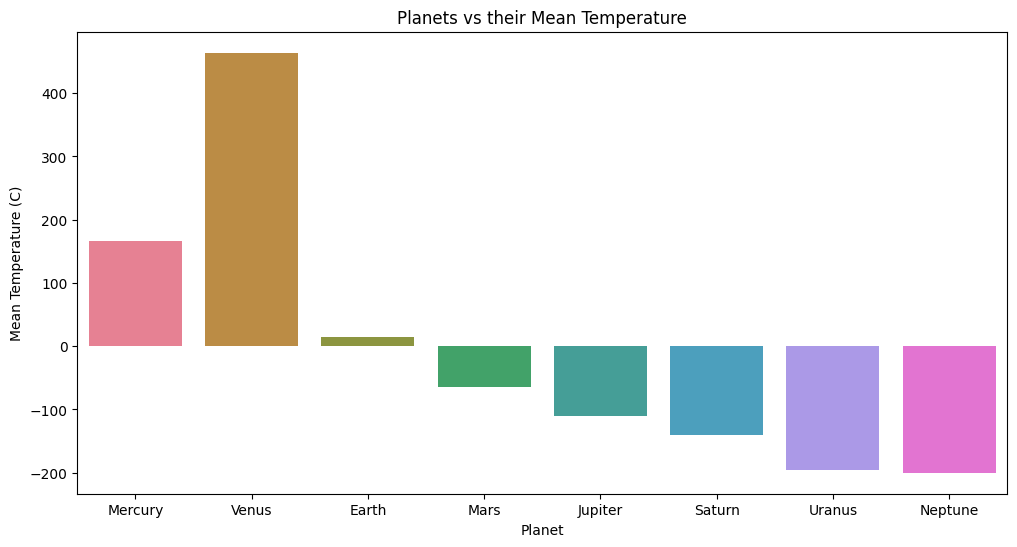

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Mean Temperature (C)'], palette="husl")
plt.ylabel('Mean Temperature (C)')
plt.xlabel('Planet')
plt.title('Planets vs their Mean Temperature')
plt.show()

## Observation
> - Venus is the hottest planet in our solar system because of its thick atmosphere, which traps heat in a runaway greenhouse effect. The surface of Venus is about 465°C (864°F) hot.

> - Venus is the second planet from the Sun and is sometimes called Earth's twin because it's similar in size and structure to Earth. However, Venus has a thick atmosphere made up of greenhouse gases like carbon dioxide, nitrogen, and sulfuric acid clouds. When sunlight passes through the atmosphere, it heats up the surface and is blocked by the atmosphere, causing the heat to build up and trap in a greenhouse effect. Although mercury is the closest to the sun but it has no atmosphere to trap the heat received from the sun.

> - Planetary surface temperatures tend to get colder the farther a planet is from the Sun.

## 12. Which planet has highest number of moons?

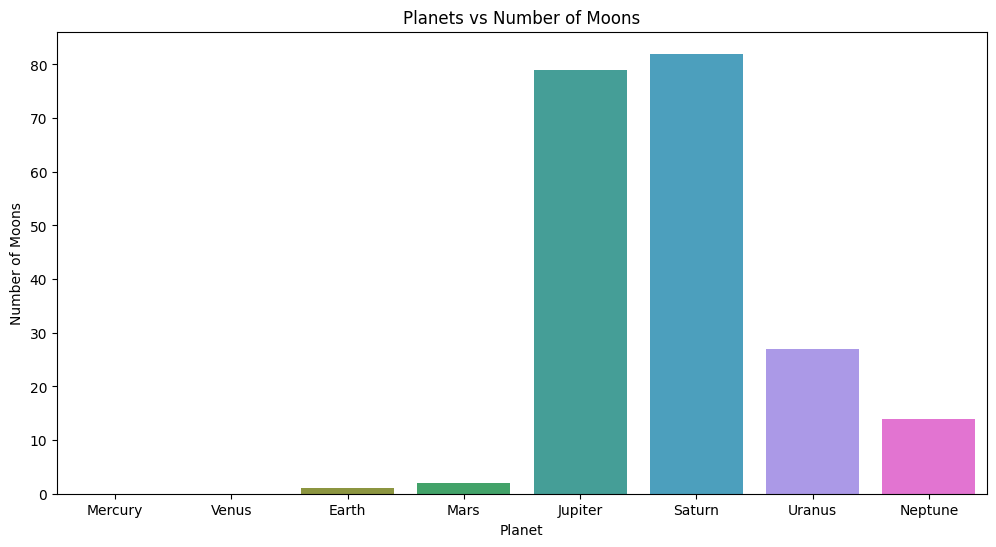

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Planet'], y = df['Number of Moons'], palette="husl")
plt.ylabel('Number of Moons')
plt.xlabel('Planet')
plt.title('Planets vs Number of Moons')
plt.show()

## Observation

> - Saturn has the most moons of any planet in our solar system, with 82, while Jupiter has 79.

<h1><center style="color:orange;background:purple;border-radius:50px;padding:25px">Summary</center></h1>

The planets of our solar system are a diverse array of celestial bodies orbiting the Sun. There are eight planets in total, classified into two main groups: the inner terrestrial planets (Mercury, Venus, Earth, and Mars) and the outer gas giants (Jupiter, Saturn, Uranus, and Neptune). Each planet has unique characteristics, including size, composition, atmosphere, and orbital properties. The inner planets are primarily rocky and have solid surfaces, while the outer planets are predominantly composed of gases and lack solid surfaces. Additionally, the planets vary in terms of their moons, rings, magnetic fields, and surface features. Studying these planets provides valuable insights into planetary formation, evolution, and the potential for extraterrestrial life.

> **Stay Tuned for more..**

> **Please share your feedback and suggestions and help me improve 😇**